In [24]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 8)


## **Predicting the Chances of a Stroke**

#### **Introduction:**

Strokes are serious life-threatening medical conditions that happens when the blood supply to part of the brain is cut off. It is imperative that strokes are met with immediate treatment to prevent brain damage. According to the World Health Organization (WHO), strokes are the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. 

Our project intends to accurately predict the chances of a stroke occuring in individuals by examining a variety of input parameters. (need to narrow this down)

Stroke Prediction Dataset, the title of the dataset we chose for this project, was adapted from the kaggle data scientist fedesoriano. The dataset provides ten clinical features for predicting strokes: gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, and smoking_status.

link to dataset: (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download)

#### **Preliminary Exploratory Data Analysis:**
**Reading and Tidying Data**

In [48]:
 #randomizes rows
set.seed(1234)

#reading dataset into R
stroke_data <- read_csv("data/stroke_data.csv")  %>%
filter(bmi!= "N/A") %>%
mutate(bmi = as.numeric(bmi))

#splits data into training and testing sets
stroke_split <- initial_split(stroke_data, prop = 0.75, strata = stroke) 
    stroke_train <- training(stroke_split)
    stroke_test <- testing(stroke_split)

s

 #removes N/A values in bmi column
 stroke_train <- filter(stroke_train, bmi != "N/A") 
    stroke_train  #3832 - 3687 = 145 rows that have missing data in bmi column
   

Rows: 5110 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): gender, ever_married, work_type, Residence_type, bmi, smoking_status
dbl (6): id, age, hypertension, heart_disease, avg_glucose_level, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ERROR: Error in eval(expr, envir, enclos): object 's' not found


**Summarized Data**

In [49]:
# the average glucose level of stroke/no stroke
stroke_train |> 
group_by(stroke) |>
summarize(avg_gluc = mean(avg_glucose_level))

# the average bmi of stroke/no stroke
stroke_train |> 
group_by(stroke) |>
summarize(avg_BMI = mean(bmi, na.rm = TRUE))

# the average age of stroke/no stroke
stroke_train |>
group_by(stroke) |>
summarize(avg_age = mean(age))

# the number of people for each smoking status of stroke/no stroke
stroke_train |>
group_by(stroke, smoking_status) |>
summarize(number_of_people = n())

# the number of people with/without heart disease
stroke_train |>
group_by(stroke, heart_disease) |>
summarize(number_of_people = n())

stroke,avg_gluc
<dbl>,<dbl>
0,104.0971
1,130.2590


stroke,avg_BMI
<dbl>,<dbl>
0,28.83380
1,30.32349


stroke,avg_age
<dbl>,<dbl>
0,41.89763
1,67.56627


`summarise()` has grouped output by 'stroke'. You can override using the
`.groups` argument.


stroke,smoking_status,number_of_people
<dbl>,<chr>,<int>
0,formerly smoked,570
0,never smoked,1338
0,smokes,527
0,Unknown,1080
1,formerly smoked,46
1,never smoked,65
1,smokes,31
1,Unknown,24


`summarise()` has grouped output by 'stroke'. You can override using the
`.groups` argument.


stroke,heart_disease,number_of_people
<dbl>,<dbl>,<int>
0,0,3362
0,1,153
1,0,136
1,1,30


**Visualization of Data**

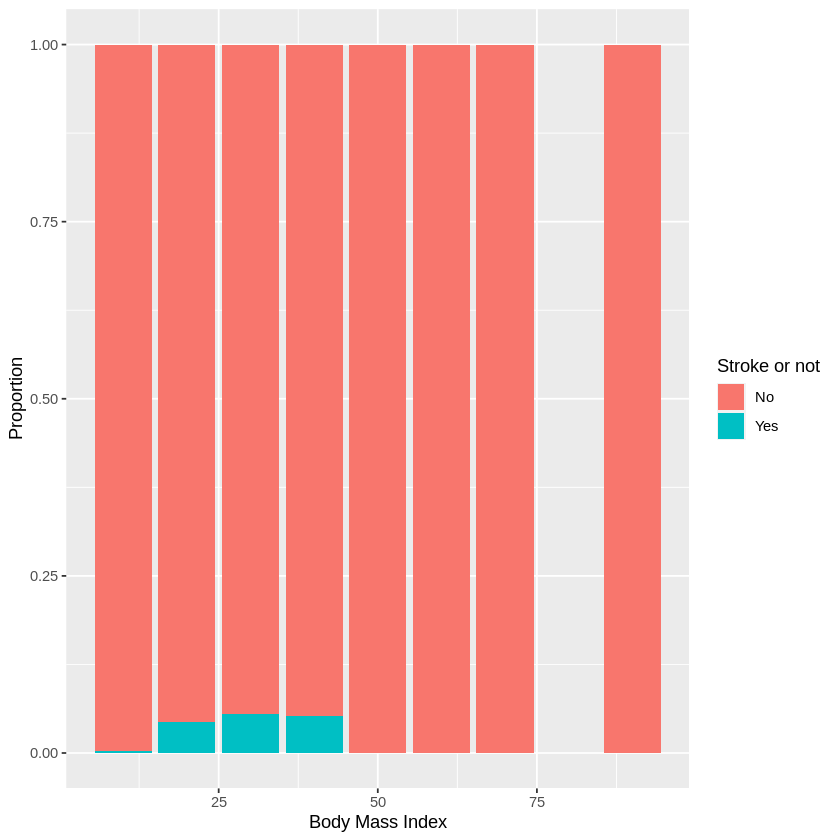

In [38]:
stroke_train_for_plot <- stroke_train |>
    mutate(generalized_bmi = floor(floor(as.double(bmi))/10)*10) |>
    mutate(stroke_or_not = as.character(stroke))

plot <- stroke_train_for_plot |>
    ggplot(aes(x = generalized_bmi, fill = stroke_or_not)) +
    geom_bar(position = 'fill') +
    labs(fill = 'Stroke or not', x = 'Body Mass Index', y = 'Proportion') +
    scale_fill_discrete(labels = c('No', 'Yes'))
plot

#### **Methods:**


We will first standardize the numerical variables and convert the categorized variables to numerical values so that we can quantify their effect on the prediction result and makes all of the variables contribute equally to the outcome. 

Then we will split the database into two parts: the training set and the testing set by the ratio of 3:1. We also need to make sure that the two parts of the database have approximately the same percentage of different types of variables.

Next, we will split the training set into 5 folds to apply cross-validation to choose the most suitable k-value with the highest accuracy.

Finally, we will train the model again using the k-value determined and the testing set to evaluate the accuracy by a confusion matrix.
In terms of visualizing the data, we will plot the data on a bar plot where the x-axis is age and the y-axis is whether or not the prediction is correct to measure our result visually.


#### **Expected outcomes and significance:**

There are simply too many variables for us to consider using all of them. But if we were to expect outcomes, individuals that have a heart disease, smoke regularly, and maintain high average glucose levels are at most risk of a stroke.

The analysis of the Stroke Prediction Dataset can potentially provide insights into the risk factors associated with strokes. By examining multiple clinical features, the researchers can identify the most significant predictors of stroke occurrence, and develop a model that accurately predicts the likelihood of a stroke occurring in an individual.

The findings of such research can have significant implications for public health. Early detection and prevention can help reduce the number of fatalities associated with the condition. 

The analysis of the Stroke Prediction Dataset can also lead to future questions related to stroke prevention and treatment. For instance, the researchers can examine the effectiveness of existing stroke prevention measures and identify areas for improvement. Additionally, the findings can lead to the development of new treatment and prevention strategies that can further reduce the incidence of strokes.